In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

# Loading the housing price dataset (assuming the file name is "housing_price.csv")
df = pd.read_csv("amz_uk_price_prediction_dataset.csv")

In [2]:
# Display the first few rows of the dataset
df.head()

# Retrieving the number of rows and columns in the dataframe
df.shape

# Displaying the data types of each column in the dataframe
df.dtypes

uid                    int64
asin                  object
title                 object
stars                float64
reviews                int64
price                float64
isBestSeller            bool
boughtInLastMonth      int64
category              object
dtype: object

Part 1: Understanding Product Categories
Business Question: What are the most popular product categories on Amazon UK, and how do they compare in terms of listing frequency?

Frequency Tables:

Generate a frequency table for the product category.
Which are the top 5 most listed product categories?
Visualizations:

Display the distribution of products across different categories using a bar chart. If you face problems understanding the chart, do it for a subset of top categories.
For a subset of top categories, visualize their proportions using a pie chart. Does any category dominate the listings?

In [3]:
# Frequency table for 'category'
frequency_table = df['category'].value_counts().head()

# Calculating the proportion of each unique value in the 'category'
proportion_table = df['category'].value_counts(normalize=True).head()

frequency_table, proportion_table

(category
 Sports & Outdoors                         836265
 Beauty                                     19312
 Handmade Clothing, Shoes & Accessories     19229
 Bath & Body                                19092
 Birthday Gifts                             18978
 Name: count, dtype: int64,
 category
 Sports & Outdoors                         0.342219
 Beauty                                    0.007903
 Handmade Clothing, Shoes & Accessories    0.007869
 Bath & Body                               0.007813
 Birthday Gifts                            0.007766
 Name: proportion, dtype: float64)

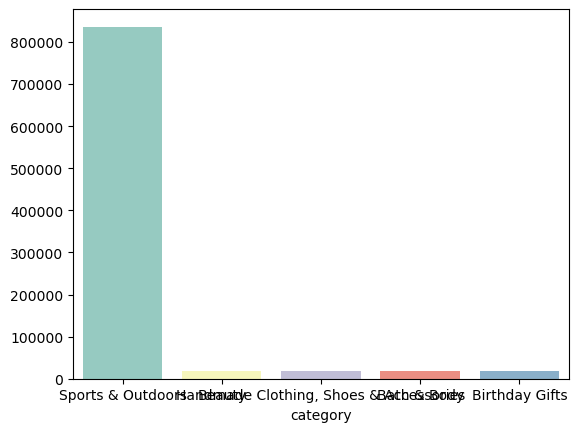

In [4]:
# Plotting a bar chart using the values from the frequency table, with colors sourced from the "Set3" palette
sns.barplot(x=frequency_table.index, y=frequency_table.values, palette="Set3");

In [5]:
 proportion_table

category
Sports & Outdoors                         0.342219
Beauty                                    0.007903
Handmade Clothing, Shoes & Accessories    0.007869
Bath & Body                               0.007813
Birthday Gifts                            0.007766
Name: proportion, dtype: float64

([<matplotlib.patches.Wedge at 0x1eb0cb0f450>,
 [Text(0.6292648421398268, -0.9022337604228402, 'Sports & Outdoors'),
  Text(-0.4403096261172907, 1.0080314643643085, 'Beauty'),
  Text(-0.5697517519138183, 0.9409478950458069, 'Handmade Clothing, Shoes & Accessories'),
  Text(-0.6885360397360965, 0.8578567024768954, 'Bath & Body'),
  Text(-0.7947059751143304, 0.760554017225326, 'Birthday Gifts')],
 [Text(0.3432353684399055, -0.4921275056851855, '91.6%'),
  Text(-0.24016888697306762, 0.5498353441987136, '2.1%'),
  Text(-0.3107736828620827, 0.513244306388622, '2.1%'),
  Text(-0.3755651125833253, 0.46792183771467016, '2.1%'),
  Text(-0.4334759864259983, 0.4148476457592687, '2.1%')])

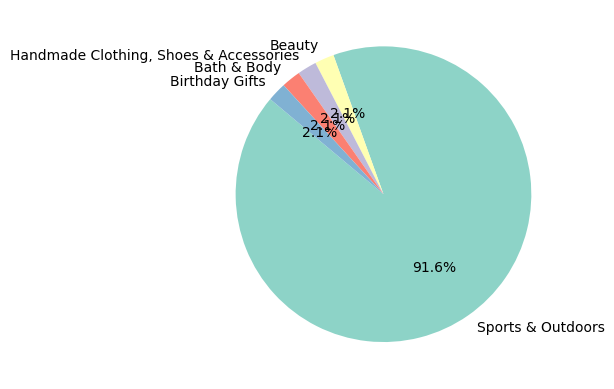

In [6]:
labels = proportion_table.index.tolist()
sizes = proportion_table.values.tolist()

plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set3"))

Part 2: Delving into Product Pricing
Business Question: How are products priced on Amazon UK, and are there specific price points or ranges that are more common?

Measures of Centrality:

Calculate the mean, median, and mode for the price of products.
What's the average price point of products listed? How does this compare with the most common price point (mode)?
Measures of Dispersion:

Determine the variance, standard deviation, range, and interquartile range for product price.
How varied are the product prices? Are there any indicators of a significant spread in prices?
Visualizations:

Is there a specific price range where most products fall? Plot a histogram to visualize the distribution of product prices. If its hard to read these diagrams, think why this is, and explain how it could be solved..
Are there products that are priced significantly higher than the rest? Use a box plot to showcase the spread and potential outliers in product pricing.

In [7]:
mean_price = df['price'].mean()
median_price = df['price'].median()
mode_price = df['price'].mode()[0]

mean_price, median_price, mode_price

#the mean is way higher than the mode, suggesting that the info is skewed and the lower price is probably more accurate.

df['price'].describe().round(2)
# most of the products are below $45 there is a significant spread as indicated by the standard deviation being so high.

(89.24380943923663, 19.09, 9.99)

count    2443651.00
mean          89.24
std          345.61
min            0.00
25%            9.99
50%           19.09
75%           45.99
max       100000.00
Name: price, dtype: float64

C:\Users\NessaJay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='price', ylabel='Count'>

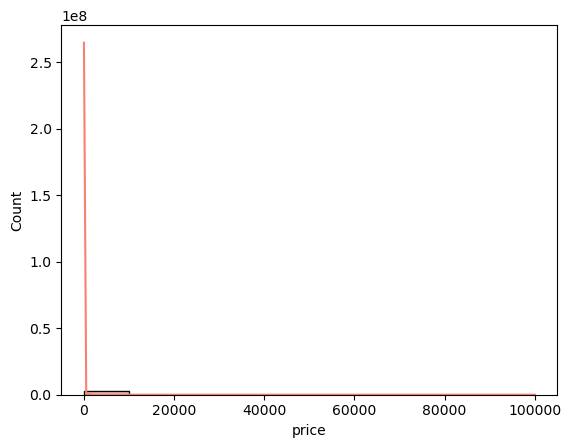

In [11]:
"""Plotting a histogram for the 'Price' column of the dataframe. it's hard to read 
because there is a huge difference between lowers and highest priced items. we can solve this by dealing with outliers
separately """

sns.histplot(df['price'], kde=True, bins=10, color="salmon")


<Axes: >

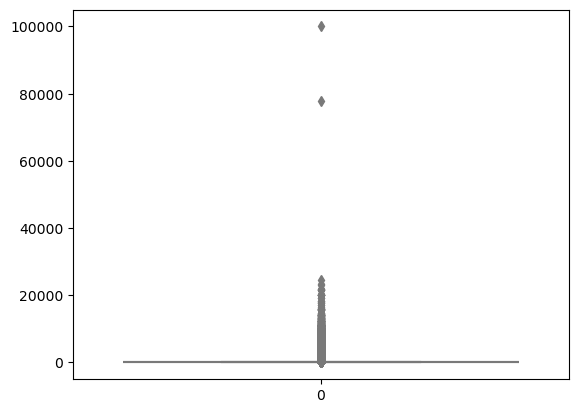

In [12]:
""" Plotting a boxplot for the 'price' column with a light blue color. There are at least 2 products that are so far out 
of the maximum that they should be considered separately"""

sns.boxplot(data = df['price'], color="lightblue")

Part 3: Unpacking Product Ratings
Business Question: How do customers rate products on Amazon UK, and are there any patterns or tendencies in the ratings?

Measures of Centrality:

Calculate the mean, median, and mode for the rating of products.
How do customers generally rate products? Is there a common trend?
Measures of Dispersion:

Determine the variance, standard deviation, and interquartile range for product rating.
Are the ratings consistent, or is there a wide variation in customer feedback?
Shape of the Distribution:

Calculate the skewness and kurtosis for the rating column.
Are the ratings normally distributed, or do they lean towards higher or lower values?
Visualizations:

Plot a histogram to visualize the distribution of product ratings. Is there a specific rating that is more common?

In [17]:
mean_review = df['reviews'].mean()
median_review = df['reviews'].median()
mode_review= df['reviews'].mode()[0]

mean_review, median_review, mode_review

df['reviews'].describe().round(2)

#there is a huge variance in this data. it seems most products have around 60 reviews. 


count    2443651.00
mean         480.63
std         5944.12
min            0.00
25%            0.00
50%            0.00
75%           59.00
max      1356658.00
Name: reviews, dtype: float64

In [29]:
# Calculate skewness. 
skewness = df['reviews'].skew()

# Calculate kurtosis
kurtosis = df['reviews'].kurtosis()

In [30]:
#It is very skewed to the right

skewness

102.81782179557166

In [31]:
# there is a huge difference between the top of the curve and the edges.

kurtosis

17741.01460473757

C:\Users\NessaJay\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='reviews', ylabel='Count'>

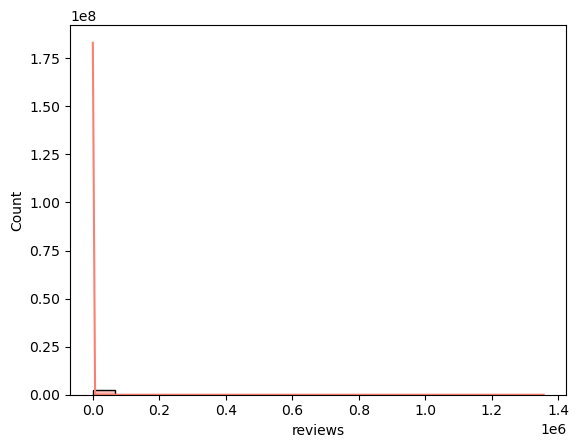

In [33]:
"""Plotting a histogram for the 'reviews' column of the dataframe. it's hard to read 
because there is a huge difference between the amount of reviews and kind. """

sns.histplot(df['reviews'], kde=True, bins=20, color="salmon")